In [1]:
import pandas as pd
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

### Using pickle to load the file

In [2]:
# Load data 
import pickle
Housing_data = pickle.load( open( "./housing.pkl", "rb" ) )
print(Housing_data)

[[  1710      3 208500]
 [  1262      3 181500]
 [  1786      3 223500]
 ...
 [  2340      4 266500]
 [  1078      2 142125]
 [  1256      3 147500]]


### Need to arrange data, in proper format - Now it has 3 column we only size(1st column), the last column(Price) and converting size from feet to hundred metresquare and price in thousand euros

In [3]:
#print(data[:,0])
#print(data[:,2])
h_data1 = np.hstack(  (  (Housing_data[:,0]*0.3048**2/100).reshape((len(Housing_data),1))   , (Housing_data[:,2]/1000).reshape((len(Housing_data),1))   )  )  

Checking if data has NAN values or not. Prelimary checks to see the datatypes and other.

In [4]:
print(h_data1.dtype)
print(np.isnan(h_data1).sum())

float64
0


## Visualizing data to get a rough idea. We can do it as data is 2D.

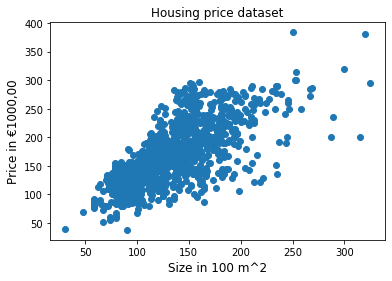

In [5]:
plt.title('Housing price dataset', fontsize=12) 
plt.ylabel('Price in €1000,00', fontsize=12)
plt.xlabel('Size in 100 m^2', fontsize=12)
plt.scatter(h_data1[:,0]*100, h_data1[:,1])

### Defining linear regression models with input and output dimension. Taking input as dimension of data and ouput.

In [6]:
class linear_Regression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(linear_Regression, self).__init__() 
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

input_dim = 1
output_dim = 1
model = linear_Regression(input_dim,output_dim)

Defining learning rate, epochs and loss function for our 

In [7]:
criterion = nn.MSELoss()# Mean Squared Loss
l_rate = 0.2
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) #Stochastic Gradient Descent
#optimiser = torch.optim.Adam(model.parameters(), lr=l_rate)

epochs = 500

x_train = h_data1[:,0]
x_train = x_train.reshape((len(x_train),1))
y_correct = h_data1[:,1]
y_correct = y_correct.reshape((len(y_correct),1))

### Starting training loop. Forward loop, then we will measure the loss using criterion and then we will do backpropogation using autograd

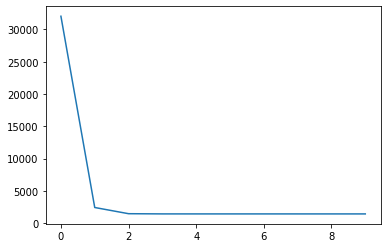

epoch 9, loss 1430.4814453125


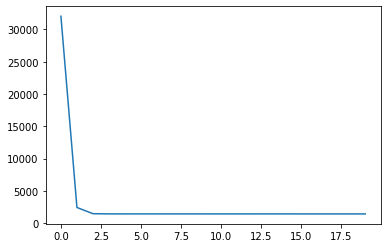

epoch 19, loss 1428.8182373046875


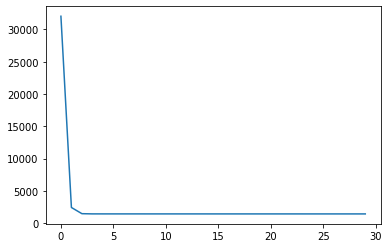

epoch 29, loss 1427.7783203125


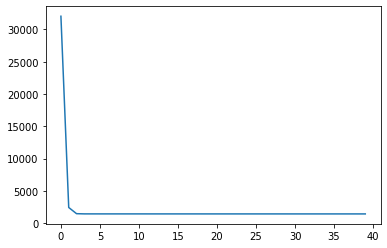

epoch 39, loss 1427.1279296875


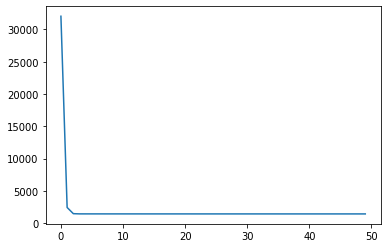

epoch 49, loss 1426.7210693359375


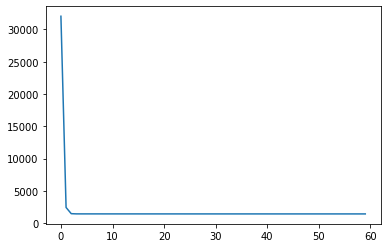

epoch 59, loss 1426.4664306640625


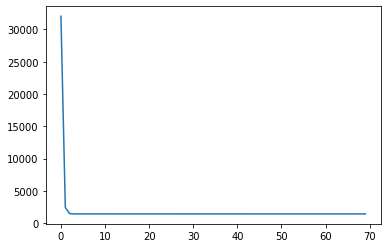

epoch 69, loss 1426.30712890625


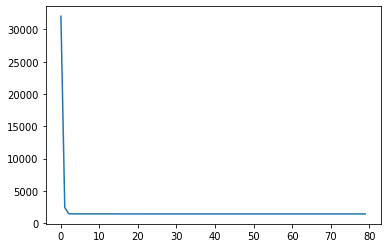

epoch 79, loss 1426.2076416015625


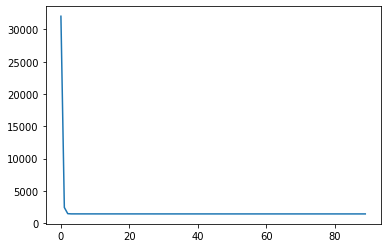

epoch 89, loss 1426.1453857421875


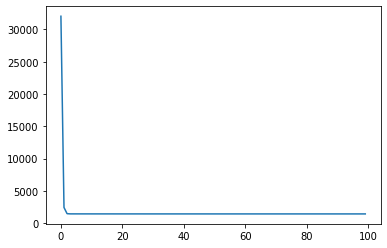

epoch 99, loss 1426.1064453125


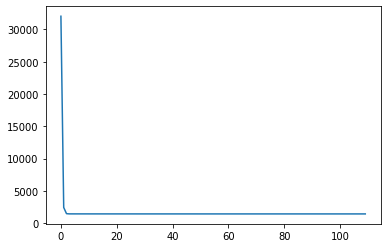

epoch 109, loss 1426.0821533203125


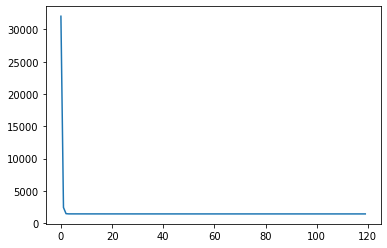

epoch 119, loss 1426.0667724609375


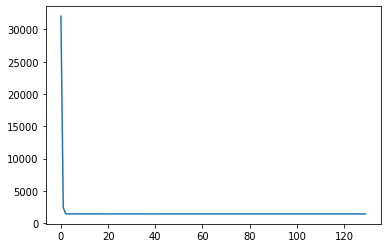

epoch 129, loss 1426.0577392578125


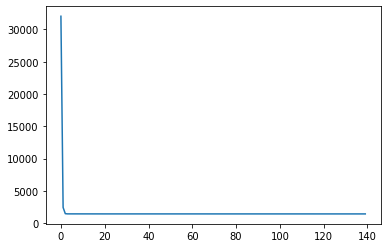

epoch 139, loss 1426.0516357421875


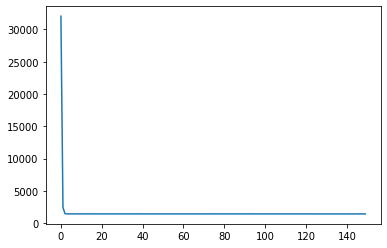

epoch 149, loss 1426.047607421875


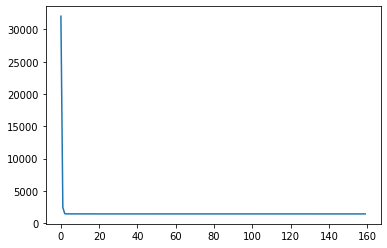

epoch 159, loss 1426.044921875


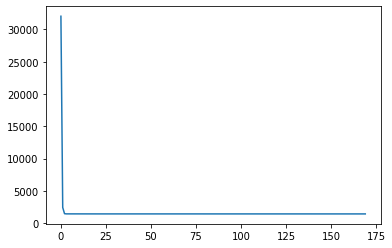

epoch 169, loss 1426.0440673828125


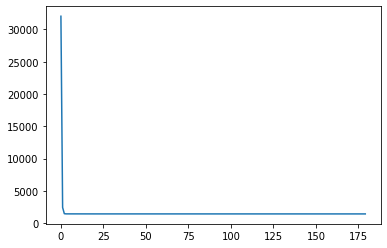

epoch 179, loss 1426.0430908203125


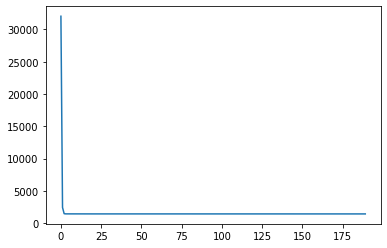

epoch 189, loss 1426.0423583984375


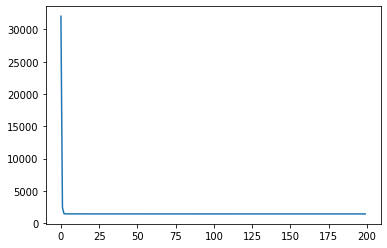

epoch 199, loss 1426.0421142578125


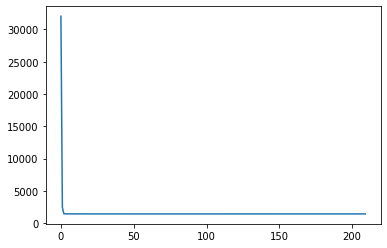

epoch 209, loss 1426.0419921875


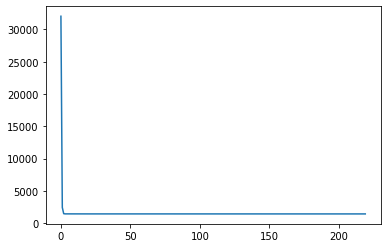

epoch 219, loss 1426.0418701171875


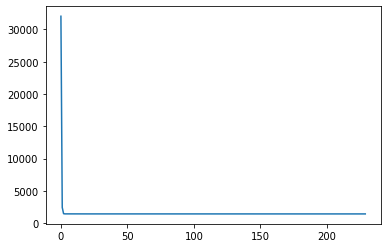

epoch 229, loss 1426.041748046875


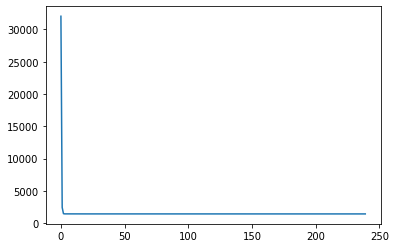

epoch 239, loss 1426.041259765625


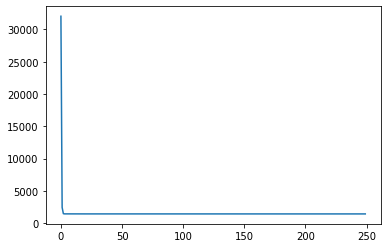

epoch 249, loss 1426.0413818359375


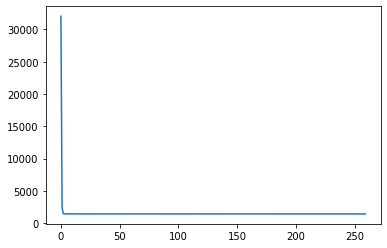

epoch 259, loss 1426.0413818359375


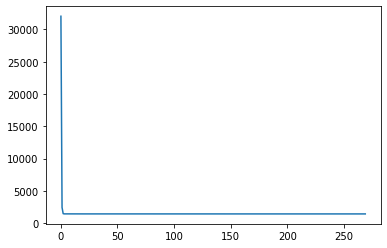

epoch 269, loss 1426.0413818359375


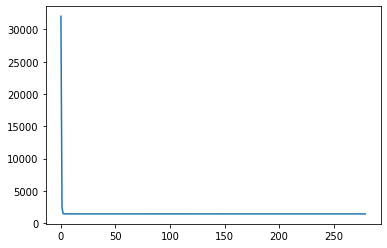

epoch 279, loss 1426.04150390625


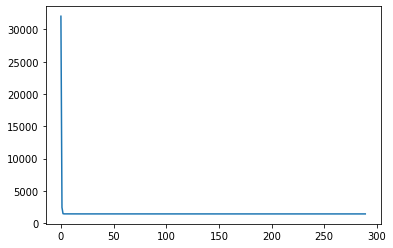

epoch 289, loss 1426.04150390625


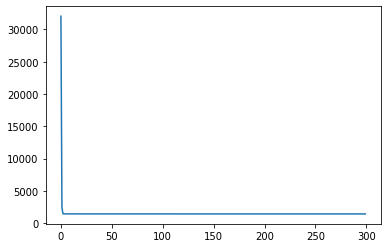

epoch 299, loss 1426.04150390625


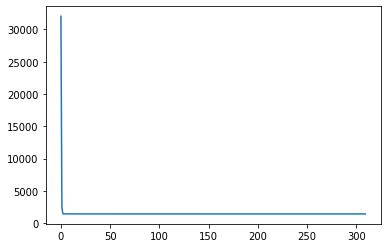

epoch 309, loss 1426.041748046875


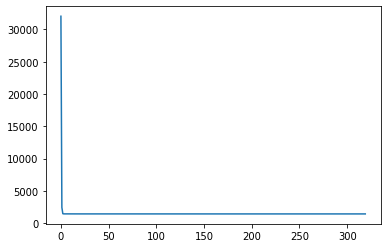

epoch 319, loss 1426.041748046875


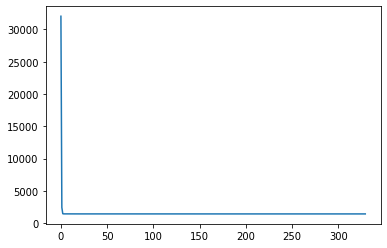

epoch 329, loss 1426.041748046875


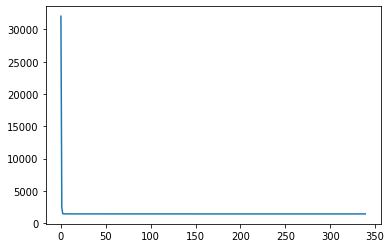

epoch 339, loss 1426.0418701171875


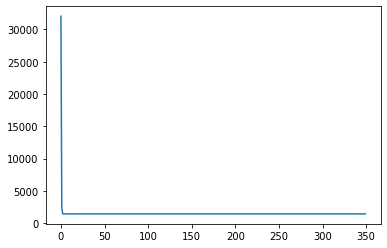

epoch 349, loss 1426.04150390625


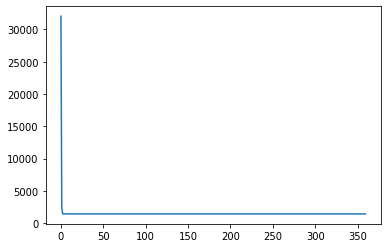

epoch 359, loss 1426.041748046875


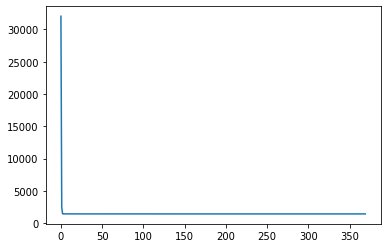

epoch 369, loss 1426.0413818359375


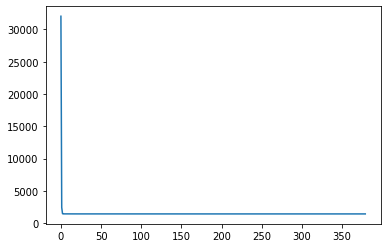

epoch 379, loss 1426.04150390625


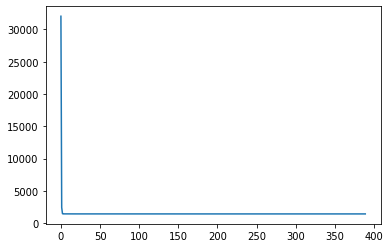

epoch 389, loss 1426.0413818359375


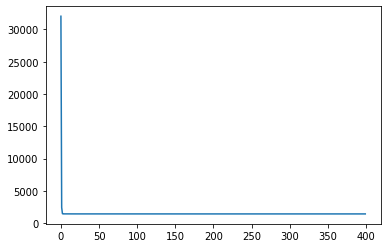

epoch 399, loss 1426.04150390625


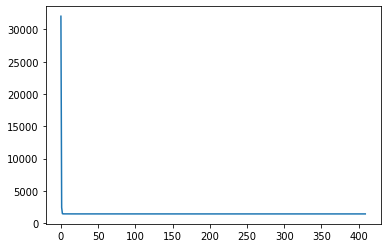

epoch 409, loss 1426.0413818359375


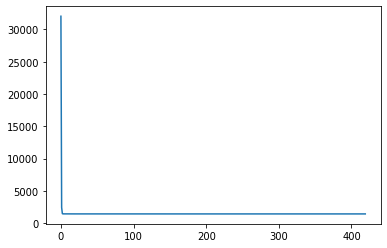

epoch 419, loss 1426.0416259765625


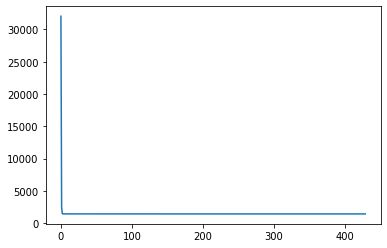

epoch 429, loss 1426.04150390625


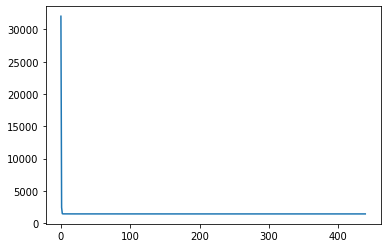

epoch 439, loss 1426.04150390625


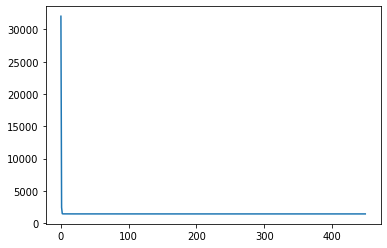

epoch 449, loss 1426.04150390625


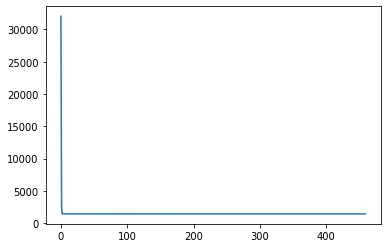

epoch 459, loss 1426.04150390625


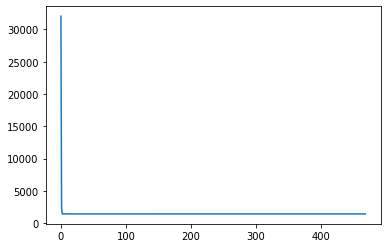

epoch 469, loss 1426.0413818359375


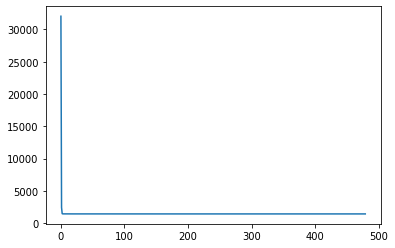

epoch 479, loss 1426.0413818359375


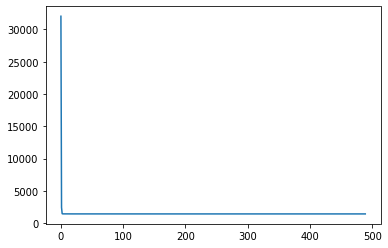

epoch 489, loss 1426.0413818359375


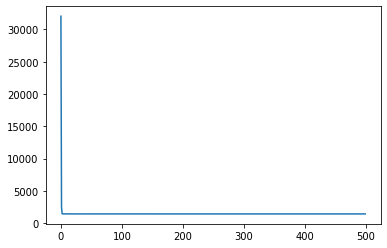

epoch 499, loss 1426.0413818359375


In [8]:
save_loss = []
coeffLoss = []
for epoch in range(epochs):

    inputs = Variable(torch.from_numpy(x_train)).float()
    labels = Variable(torch.from_numpy(y_correct)).float()

    #clear grads
    optimiser.zero_grad()
    #forward to get predicted values

    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()# back props
    optimiser.step()# update the parameters
    save_loss.append(loss.item())
         
    if (epoch+1) % 10 == 0:
        plt.figure()
        plt.plot(save_loss)
        plt.show()
        print('epoch {}, loss {}'.format(epoch,loss.item()))
        coeffs = model.state_dict()
        t0 =  coeffs['linear.bias'].cpu().numpy().item()
        t1 =  coeffs['linear.weight'].cpu().numpy().item()
        coeffLoss.append( np.hstack([t0, t1, loss.item() ]) )

### Evaluating our model in our data

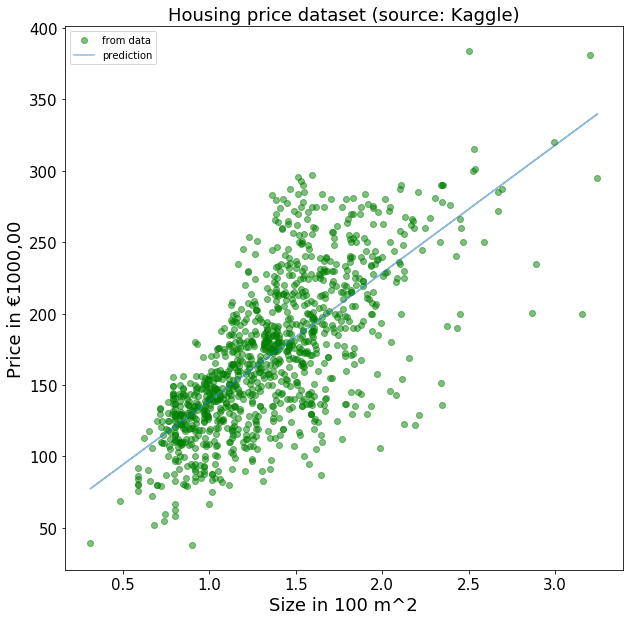

OrderedDict([('linear.weight', tensor([[89.4571]])), ('linear.bias', tensor([49.5428]))])


In [9]:
loss =  np.asarray(  save_loss)
coeffLoss =  np.asarray(coeffLoss)
predicted = model.forward(Variable(torch.from_numpy(x_train)).float())

predicted = predicted.detach().numpy()

plt.figure()
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Housing price dataset (source: Kaggle)', fontsize=18) 
plt.ylabel('Price in €1000,00', fontsize=18)
plt.xlabel('Size in 100 m^2', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 12)
plt.plot(x_train, y_correct, 'go', label = 'from data', alpha = .5)
plt.plot(x_train, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(model.state_dict())